In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
df=pd.read_csv('zomato.csv',encoding = "ISO-8859-1")

## 3.1 Plot the bar graph top 15 restaurants have a maximum number of outlets.

3.1


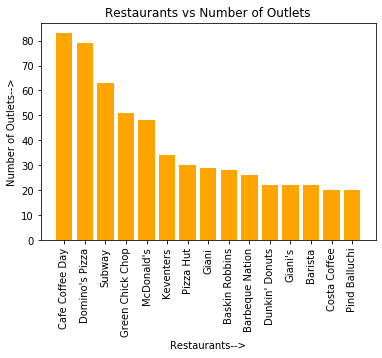

In [47]:
restaurants=list(df['Restaurant Name'].value_counts().index)[:15]
outlets=df['Restaurant Name'].value_counts().values[:15]
plt.bar(restaurants,outlets,color='orange')
plt.xlabel('Restaurants-->')
plt.ylabel('Number of Outlets-->')
plt.title('Restaurants vs Number of Outlets')
plt.xticks(rotation=90)
print('3.1')
plt.show()

## 3.2 Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

3.2


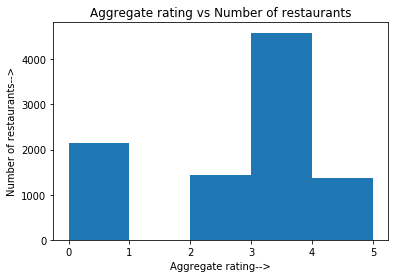

In [51]:
df['Aggregate rating'].dropna(inplace=True)
plt.hist(df['Aggregate rating'],bins=np.arange(0,6))
print('3.2')
plt.xlabel('Aggregate rating-->')
plt.ylabel('Number of restaurants-->')
plt.title('Aggregate rating vs Number of restaurants')
plt.show()

## 3.3 Plot the bar graph top 10 restaurants in the data with the highest number of votes.

3.3


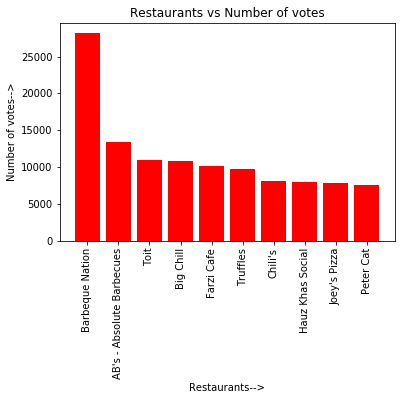

In [58]:
df_restaurant_votes=df[['Restaurant Name','Votes']]
restaurant_votes=df_restaurant_votes.values
dict_restaurant_votes={}
for i in range(len(restaurant_votes)):
    restaurant=restaurant_votes[i][0]
    votes=restaurant_votes[i][1]
    dict_restaurant_votes[restaurant]=dict_restaurant_votes.get(restaurant,0)+votes
restaurants=np.array(list(dict_restaurant_votes.keys()))
votes=np.array(list(dict_restaurant_votes.values()))
indices=votes.argsort()[::-1][:10]
restaurants=restaurants[indices]
votes=votes[indices]
plt.bar(restaurants,votes,color='r')
plt.xlabel('Restaurants-->')
plt.ylabel('Number of votes-->')
plt.title('Restaurants vs Number of votes')
plt.xticks(rotation=90)
print('3.3')
plt.show()

## 3.4 Plot the pie graph of top 10 cuisines present in restaurants in the USA.

3.4


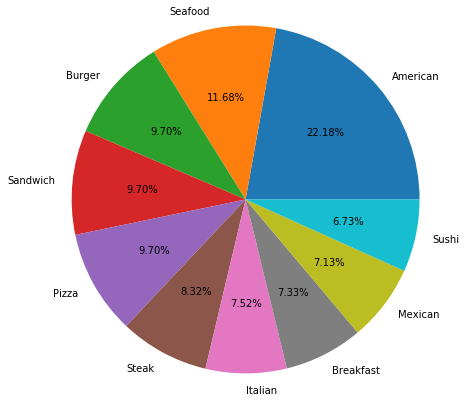

In [112]:
df_usa=df[df['Country Code']==216]
df_usa['Cuisines'].dropna(inplace=True)
cuisines_usa=df_usa['Cuisines'].values
cuisines_usa_lst=[]
for i in cuisines_usa:
        for j in i.split(','):
            cuisines_usa_lst.append(j.strip())
cuisines,counts=np.unique(cuisines_usa_lst,return_counts=True)
indices=np.argsort(counts)[::-1][:10]
cuisines=cuisines[indices]
counts=counts[indices]    
plt.pie(counts,labels=cuisines,radius=2,autopct='%.2f%%')
print('3.4')
plt.show()

## 3.5 Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

3.5


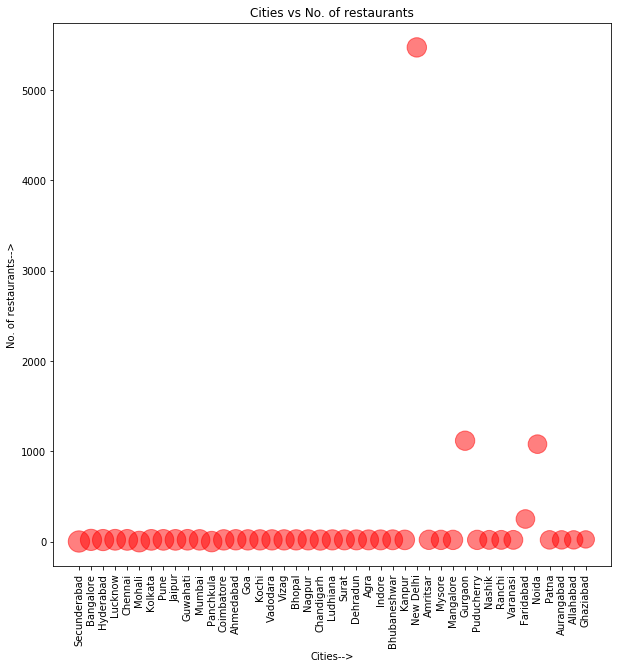

In [113]:
df_india=df[df['Country Code']==1]
vrc=df_india[['Votes','Aggregate rating','City']].values
dict_city_restaurants={}
dict_crv={}
for i in vrc:
    rating=i[1]
    votes=i[0]
    city=i[2]
    dict_city_restaurants[city]=dict_city_restaurants.get(city,0)+1
    if not city in dict_crv:
        dict_crv[city]=[[],[]]
    dict_crv[city][0].append(rating)
    dict_crv[city][1].append(votes)
dict_weighted_rating={}
for city in dict_crv:
    rating=np.array(dict_crv[city][0])
    votes=np.array(dict_crv[city][1])
    if sum(votes)>0:
        weighted_rating=np.sum(rating*votes)/sum(votes)
        dict_weighted_rating[city]=weighted_rating   
city=np.array(list(dict_weighted_rating.keys()))
rating=np.array(list(dict_weighted_rating.values()))
restaurants=np.array(list(dict_city_restaurants.values()))
indices=rating.argsort()[::-1]
city=city[indices]
rating=rating[indices]*100    
restaurants=restaurants[indices]
plt.figure(figsize=(10, 10))
plt.scatter(city,restaurants,s=rating,alpha=0.5,color='red')
plt.xticks(rotation=90)
plt.xlabel('Cities-->')
plt.ylabel('No. of restaurants-->')
plt.title('Cities vs No. of restaurants')
print('3.5')
plt.show()